In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# show all columns
pd.set_option('display.max_columns', None)

In [ ]:
Anime_data = pd.read_csv('/content/anime_data_2015_2025.csv')
Anime_data.head()

anime_id                               title  type  score  scored_by  \
0     52991                   Sousou no Frieren   NaN    NaN        NaN   
1     60022                One Piece Fan Letter   NaN    NaN        NaN   
2     38524  Shingeki no Kyojin Season 3 Part 2   NaN    NaN        NaN   
3     28977                            Gintama°   NaN    NaN        NaN   
4     39486                  Gintama: The Final   NaN    NaN        NaN   

            status  episodes  start_date    end_date  \
0  finished_airing       NaN  2023-09-29  2024-03-22   
1  finished_airing       NaN  2024-10-20  2024-10-20   
2  finished_airing       NaN  2019-04-29  2019-07-01   
3  finished_airing       NaN  2015-04-08  2016-03-30   
4  finished_airing       NaN  2021-01-08  2021-01-08   

                                              genres  \
0                 Adventure, Drama, Fantasy, Shounen   
1                Action, Adventure, Fantasy, Shounen   
2  Action, Drama, Gore, Military, Shounen, Surviv...   
3  Action, Comedy, Gag Humor, Historical, Parody,...   
4  Action, Comedy, Drama, Gag Humor, Historical, ...   

                                            synopsis  \
0  During their decade-long quest to defeat the D...   
1  Although the golden age of piracy is about to ...   
2  Seeking to restore humanity's diminishing hope...   
3  Gintoki, Shinpachi, and Kagura return as the f...   
4  Two years have passed following the Tendoshuu'...   

                                        main_picture  url  title_english  \
0  https://cdn.myanimelist.net/images/anime/1015/...  NaN            NaN   
1  https://cdn.myanimelist.net/images/anime/1455/...  NaN            NaN   
2  https://cdn.myanimelist.net/images/anime/1517/...  NaN            NaN   
3  https://cdn.myanimelist.net/images/anime/3/720...  NaN            NaN   
4  https://cdn.myanimelist.net/images/anime/1245/...  NaN            NaN   

   title_japanese  title_synonyms  demographics                studios rating  \
0             NaN             NaN           NaN               Madhouse  pg_13   
1             NaN             NaN           NaN         Toei Animation  pg_13   
2             NaN             NaN           NaN             Wit Studio      r   
3             NaN             NaN           NaN  Bandai Namco Pictures  pg_13   
4             NaN             NaN           NaN  Bandai Namco Pictures  pg_13   

        source  rank  popularity  members  favorites  
0        manga     1         164      NaN        NaN  
1  light_novel     4        2426      NaN        NaN  
2        manga     5          21      NaN        NaN  
3        manga     6         343      NaN        NaN  
4        manga     7        1537      NaN        NaN

In [ ]:
Anime_data.shape

(2494, 24)

In [ ]:
Anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        2494 non-null   int64  
 1   title           2494 non-null   object 
 2   type            0 non-null      float64
 3   score           0 non-null      float64
 4   scored_by       0 non-null      float64
 5   status          2494 non-null   object 
 6   episodes        0 non-null      float64
 7   start_date      2494 non-null   object 
 8   end_date        2427 non-null   object 
 9   genres          2492 non-null   object 
 10  synopsis        2445 non-null   object 
 11  main_picture    2494 non-null   object 
 12  url             0 non-null      float64
 13  title_english   0 non-null      float64
 14  title_japanese  0 non-null      float64
 15  title_synonyms  0 non-null      float64
 16  demographics    0 non-null      float64
 17  studios         2439 non-null   o

# Data Preprocessing

In [ ]:
Anime_data=Anime_data.dropna(axis=1, how='all')


In [ ]:
Anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      2494 non-null   int64 
 1   title         2494 non-null   object
 2   status        2494 non-null   object
 3   start_date    2494 non-null   object
 4   end_date      2427 non-null   object
 5   genres        2492 non-null   object
 6   synopsis      2445 non-null   object
 7   main_picture  2494 non-null   object
 8   studios       2439 non-null   object
 9   rating        2489 non-null   object
 10  source        2488 non-null   object
 11  rank          2494 non-null   int64 
 12  popularity    2494 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 253.4+ KB


# For Power BI/Tableau: Start by cleaning and preparing the dataset, then import it into your chosen tool to create visualizations.

# Handling Missing Values

In [ ]:
# End date if missing , impute with placeholder Ongoing
Anime_data.loc[:, 'end_date'] = Anime_data['end_date'].fillna('Ongoing')

# genres
Anime_data.loc[:, 'genres'] = Anime_data['genres'].fillna('Unknown')

# studios
Anime_data.loc[:, 'studios'] = Anime_data['studios'].fillna('Unknown')

# rating
Anime_data.loc[:, 'rating'] = Anime_data['rating'].fillna('g')

# source
Anime_data.loc[:, 'source'] = Anime_data['source'].fillna('manga')

# Synopsis
Anime_data.loc[:, 'synopsis'] = Anime_data['synopsis'].fillna('Synopsis not available')

In [ ]:
Anime_data.isnull().sum()

anime_id        0
title           0
status          0
start_date      0
end_date        0
genres          0
synopsis        0
main_picture    0
studios         0
rating          0
source          0
rank            0
popularity      0
dtype: int64

# Fixing DataTypes


In [ ]:
# start dat and end date data type fix
# Specify the format to handle different date representations, or use infer_datetime_format=True
Anime_data['start_date'] = pd.to_datetime(Anime_data['start_date'], format='%Y-%m-%d', errors='coerce')
Anime_data['end_date'] = pd.to_datetime(Anime_data['end_date'], errors='coerce') # 'end_date' might have 'Ongoing'

# cehck dtypeof start_date
Anime_data['start_date'].dtype

dtype('<M8[ns]')

In [ ]:
# datatype check
Anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   anime_id      2494 non-null   int64         
 1   title         2494 non-null   object        
 2   status        2494 non-null   object        
 3   start_date    2490 non-null   datetime64[ns]
 4   end_date      2423 non-null   datetime64[ns]
 5   genres        2494 non-null   object        
 6   synopsis      2494 non-null   object        
 7   main_picture  2494 non-null   object        
 8   studios       2494 non-null   object        
 9   rating        2494 non-null   object        
 10  source        2494 non-null   object        
 11  rank          2494 non-null   int64         
 12  popularity    2494 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 253.4+ KB


# Feature Engineering

In [ ]:
#Extract Year/Month from Dates:
#Create new columns like start_year and start_month from start_date for temporal analysis.
Anime_data.loc[:, 'start_year'] = Anime_data['start_date'].dt.year
Anime_data.loc[:, 'start_month'] = Anime_data['start_date'].dt.month


In [ ]:
# Genre - One hot encoding

# Split genres by commas
genres_split = Anime_data['genres'].str.split(',', expand=True)

# Rename columns to reflect the genre names
genres_split.columns = [f'genre_{i+1}' for i in range(genres_split.shape[1])]
Anime_data = pd.concat([Anime_data, genres_split], axis=1)



In [ ]:
Anime_data.head()

anime_id                               title           status start_date  \
0     52991                   Sousou no Frieren  finished_airing 2023-09-29   
1     60022                One Piece Fan Letter  finished_airing 2024-10-20   
2     38524  Shingeki no Kyojin Season 3 Part 2  finished_airing 2019-04-29   
3     28977                            Gintama°  finished_airing 2015-04-08   
4     39486                  Gintama: The Final  finished_airing 2021-01-08   

    end_date                                             genres  \
0 2024-03-22                 Adventure, Drama, Fantasy, Shounen   
1 2024-10-20                Action, Adventure, Fantasy, Shounen   
2 2019-07-01  Action, Drama, Gore, Military, Shounen, Surviv...   
3 2016-03-30  Action, Comedy, Gag Humor, Historical, Parody,...   
4 2021-01-08  Action, Comedy, Drama, Gag Humor, Historical, ...   

                                            synopsis  \
0  During their decade-long quest to defeat the D...   
1  Although the golden age of piracy is about to ...   
2  Seeking to restore humanity's diminishing hope...   
3  Gintoki, Shinpachi, and Kagura return as the f...   
4  Two years have passed following the Tendoshuu'...   

                                        main_picture                studios  \
0  https://cdn.myanimelist.net/images/anime/1015/...               Madhouse   
1  https://cdn.myanimelist.net/images/anime/1455/...         Toei Animation   
2  https://cdn.myanimelist.net/images/anime/1517/...             Wit Studio   
3  https://cdn.myanimelist.net/images/anime/3/720...  Bandai Namco Pictures   
4  https://cdn.myanimelist.net/images/anime/1245/...  Bandai Namco Pictures   

  rating       source  rank  popularity  start_year  start_month    genre_1  \
0  pg_13        manga     1         164      2023.0          9.0  Adventure   
1  pg_13  light_novel     4        2426      2024.0         10.0     Action   
2      r        manga     5          21      2019.0          4.0     Action   
3  pg_13        manga     6         343      2015.0          4.0     Action   
4  pg_13        manga     7        1537      2021.0          1.0     Action   

      genre_2     genre_3      genre_4      genre_5    genre_6    genre_7  \
0       Drama     Fantasy      Shounen         None       None       None   
1   Adventure     Fantasy      Shounen         None       None       None   
2       Drama        Gore     Military      Shounen   Survival   Suspense   
3      Comedy   Gag Humor   Historical       Parody    Samurai     Sci-Fi   
4      Comedy       Drama    Gag Humor   Historical     Parody    Samurai   

    genre_8   genre_9 genre_10 genre_11  
0      None      None     None     None  
1      None      None     None     None  
2      None      None     None     None  
3   Shounen      None     None     None  
4    Sci-Fi   Shounen     None     None

In [ ]:
# split genre alo to rows for visualizations
# genres column split by delimiter , and to rows not columns
Anime_data['genres'] = Anime_data['genres'].str.split(',')
Anime_data = Anime_data.explode('genres')
Anime_data.head()

anime_id                 title           status start_date   end_date  \
0     52991     Sousou no Frieren  finished_airing 2023-09-29 2024-03-22   
0     52991     Sousou no Frieren  finished_airing 2023-09-29 2024-03-22   
0     52991     Sousou no Frieren  finished_airing 2023-09-29 2024-03-22   
0     52991     Sousou no Frieren  finished_airing 2023-09-29 2024-03-22   
1     60022  One Piece Fan Letter  finished_airing 2024-10-20 2024-10-20   

      genres                                           synopsis  \
0  Adventure  During their decade-long quest to defeat the D...   
0      Drama  During their decade-long quest to defeat the D...   
0    Fantasy  During their decade-long quest to defeat the D...   
0    Shounen  During their decade-long quest to defeat the D...   
1     Action  Although the golden age of piracy is about to ...   

                                        main_picture         studios rating  \
0  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
0  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
0  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
0  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
1  https://cdn.myanimelist.net/images/anime/1455/...  Toei Animation  pg_13   

        source  rank  popularity  start_year  start_month    genre_1  \
0        manga     1         164      2023.0          9.0  Adventure   
0        manga     1         164      2023.0          9.0  Adventure   
0        manga     1         164      2023.0          9.0  Adventure   
0        manga     1         164      2023.0          9.0  Adventure   
1  light_novel     4        2426      2024.0         10.0     Action   

      genre_2   genre_3   genre_4 genre_5 genre_6 genre_7 genre_8 genre_9  \
0       Drama   Fantasy   Shounen    None    None    None    None    None   
0       Drama   Fantasy   Shounen    None    None    None    None    None   
0       Drama   Fantasy   Shounen    None    None    None    None    None   
0       Drama   Fantasy   Shounen    None    None    None    None    None   
1   Adventure   Fantasy   Shounen    None    None    None    None    None   

  genre_10 genre_11  
0     None     None  
0     None     None  
0     None     None  
0     None     None  
1     None     None

# For Q1 - Heat map - as there is no heatmap option in power BI.

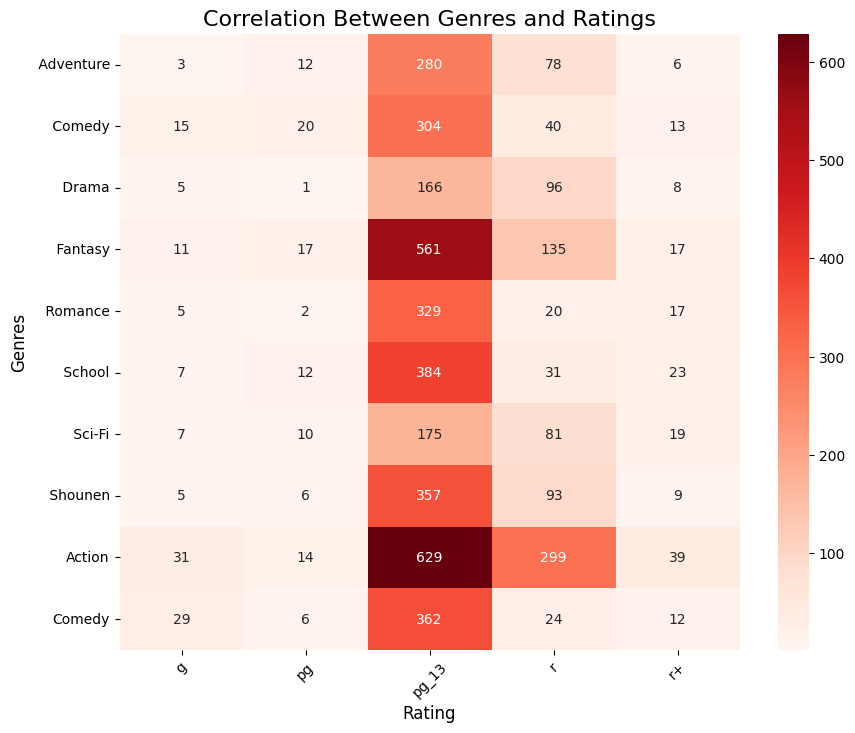

In [ ]:
# Assuming Anime_data is your original DataFrame with the 'genres' and 'rating' columns

# Step 1: Prepare Data
# Explode the 'genres' column if it's in list form
anime_data_exploded = Anime_data.explode('genres')

# Group by rating and genres, and count the occurrences
genres_rating_stats = anime_data_exploded.groupby(['rating', 'genres']).size().reset_index(name='count')

# Get the top 10 genres by count
top_10_genres = genres_rating_stats.groupby('genres')['count'].sum().nlargest(10).index

# Filter the dataset to keep only the top 10 genres
genres_rating_stats_top10 = genres_rating_stats[genres_rating_stats['genres'].isin(top_10_genres)]

# Pivot table for heatmap
heatmap_data = genres_rating_stats_top10.pivot(index='genres', columns='rating', values='count').fillna(0)

# Step 2: Visualize with Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Reds', cbar=True)
plt.title('Correlation Between Genres and Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


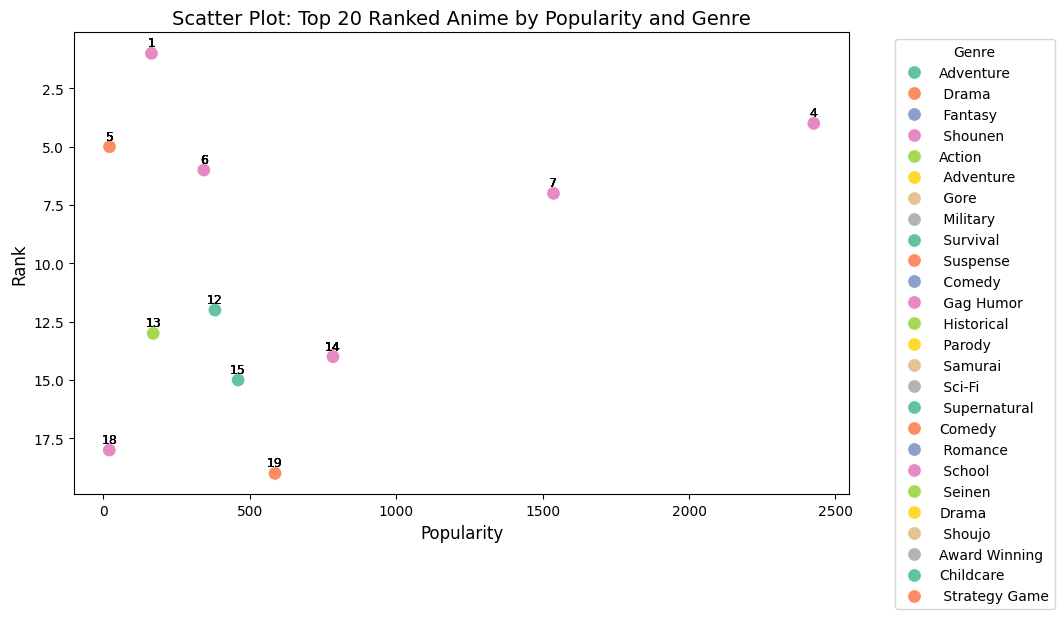

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns 'rank', 'popularity', and 'genre'
# For example:
# df = pd.read_csv('your_data.csv')

# Filter data to include only the top 20 ranked anime
df_top_20 = Anime_data[Anime_data['rank'] <= 20]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_20, x='popularity', y='rank', hue='genres', palette='Set2', s=100)

# Add labels and title
plt.title('Scatter Plot: Top 20 Ranked Anime by Popularity and Genre', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Rank', fontsize=12)

# Invert y-axis to show rank 1 at the top
plt.gca().invert_yaxis()

# Annotate points with their Rank and Popularity
for i in range(len(df_top_20)):
    plt.annotate(f'{df_top_20.iloc[i]["rank"]}',
                 (df_top_20.iloc[i]["popularity"], df_top_20.iloc[i]["rank"]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

# Show the plot
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
# Save to a new CSV file
Anime_data.to_csv('Anime_data_cleaned2.csv', index=False)

# LDA part for anime

In [ ]:
# Imports

import spacy
import nltk
import re

In [ ]:
# You'll probably need to download some nltk packages.
nltk.download('punkt')
nltk.download('stopwords')
# Download NLTK stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load SpaCy's English model for tokenization and lemmatization
nlp = spacy.load("en_core_web_sm")

In [ ]:
data= pd.read_csv('Anime_data_cleaned2.csv')
data.head()

anime_id                 title           status  start_date    end_date  \
0     52991     Sousou no Frieren  finished_airing  2023-09-29  2024-03-22   
1     52991     Sousou no Frieren  finished_airing  2023-09-29  2024-03-22   
2     52991     Sousou no Frieren  finished_airing  2023-09-29  2024-03-22   
3     52991     Sousou no Frieren  finished_airing  2023-09-29  2024-03-22   
4     60022  One Piece Fan Letter  finished_airing  2024-10-20  2024-10-20   

      genres                                           synopsis  \
0  Adventure  During their decade-long quest to defeat the D...   
1      Drama  During their decade-long quest to defeat the D...   
2    Fantasy  During their decade-long quest to defeat the D...   
3    Shounen  During their decade-long quest to defeat the D...   
4     Action  Although the golden age of piracy is about to ...   

                                        main_picture         studios rating  \
0  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
1  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
2  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
3  https://cdn.myanimelist.net/images/anime/1015/...        Madhouse  pg_13   
4  https://cdn.myanimelist.net/images/anime/1455/...  Toei Animation  pg_13   

        source  rank  popularity  start_year  start_month    genre_1  \
0        manga     1         164      2023.0          9.0  Adventure   
1        manga     1         164      2023.0          9.0  Adventure   
2        manga     1         164      2023.0          9.0  Adventure   
3        manga     1         164      2023.0          9.0  Adventure   
4  light_novel     4        2426      2024.0         10.0     Action   

      genre_2   genre_3   genre_4 genre_5 genre_6 genre_7 genre_8 genre_9  \
0       Drama   Fantasy   Shounen     NaN     NaN     NaN     NaN     NaN   
1       Drama   Fantasy   Shounen     NaN     NaN     NaN     NaN     NaN   
2       Drama   Fantasy   Shounen     NaN     NaN     NaN     NaN     NaN   
3       Drama   Fantasy   Shounen     NaN     NaN     NaN     NaN     NaN   
4   Adventure   Fantasy   Shounen     NaN     NaN     NaN     NaN     NaN   

  genre_10 genre_11  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN

**- LDA Preprocessing**

In [ ]:
# Step 1: Convert to lowercase
def lowercase_text(text):
    return text.lower() if pd.notnull(text) else ""

data['lowercase_text'] = data['synopsis'].apply(lowercase_text)

# Step 2: Remove URLs, mentions, and hashtags
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    return text

data['no_urls_mentions_hashtags'] = data['lowercase_text'].apply(remove_urls_mentions_hashtags)

# Step 3: Remove punctuation and numbers
def remove_punctuation_numbers(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

data['no_punctuation_numbers'] = data['no_urls_mentions_hashtags'].apply(remove_punctuation_numbers)



In [ ]:
spacy_stopwords = set(nlp.Defaults.stop_words)
nltk_stopwords = set(stopwords.words("english"))
stopwords_combined = spacy_stopwords.union(nltk_stopwords)

In [ ]:
# Step 4: Tokenize and lemmatize using SpaCy
# ------------------------------------------4th attempt of preprocessing- I'm crying ----------------------------

# Custom stopwords (tokens we don't want in topics)
# Combine both methods: Expand contractions and remove custom short words
def tokenize_lemmatize(text):
    doc = nlp(text)
    tokens = [
        token.text.strip() for token in doc
        if token.text.strip() and len(token.text.strip()) > 2
        and not token.is_stop and not token.is_punct
        and token.text.lower() not in stopwords_combined
    ]
    lemmas = [
        token.lemma_.strip() for token in doc if token.lemma_.strip()
        and len(token.lemma_.strip()) > 2
        and not token.is_stop and not token.is_punct
        and token.lemma_.lower() not in stopwords_combined
    ]
    return tokens, lemmas

# Apply the function to the 'no_punctuation_numbers' column
data[['tokens', 'lemmas']] = data['no_punctuation_numbers'].apply(lambda x: pd.Series(tokenize_lemmatize(x)))


In [ ]:
#for final output
final_data = data[['anime_id', 'synopsis',  'tokens', 'lemmas']]
final_data.head()

anime_id                                           synopsis  \
0     52991  During their decade-long quest to defeat the D...   
1     52991  During their decade-long quest to defeat the D...   
2     52991  During their decade-long quest to defeat the D...   
3     52991  During their decade-long quest to defeat the D...   
4     60022  Although the golden age of piracy is about to ...   

                                              tokens  \
0  [decadelong, quest, defeat, demon, king, membe...   
1  [decadelong, quest, defeat, demon, king, membe...   
2  [decadelong, quest, defeat, demon, king, membe...   
3  [decadelong, quest, defeat, demon, king, membe...   
4  [golden, age, piracy, reach, new, heights, peo...   

                                              lemmas  
0  [decadelong, quest, defeat, demon, king, membe...  
1  [decadelong, quest, defeat, demon, king, membe...  
2  [decadelong, quest, defeat, demon, king, membe...  
3  [decadelong, quest, defeat, demon, king, membe...  
4  [golden, age, piracy, reach, new, height, peop...

In [ ]:
import gensim.corpora as corpora
from gensim.models import LdaModel, CoherenceModel

# Step 1: Dictionary and Corpus

id2word = corpora.Dictionary(final_data['lemmas'])
id2word.filter_extremes(no_below=5, no_above=0.5)
texts = final_data['lemmas'].tolist()

# Bag-of-Words corpus
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Step 2
# LDA Model
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=12,
    random_state=42,
    update_every=1,
    chunksize=200,
    passes=100,
    alpha='asymmetric',
    eta='auto',
    per_word_topics=True
)

In [ ]:
# Step 3: Print the Topics

topics = lda_model.show_topics(num_topics=12, num_words=15, formatted=False)

# Print topics with topic number and words
for topic_num, words in topics:
    words_str = ", ".join([f"{word[0]} ({word[1]:.3f})" for word in words])
    print(f"**Topic {topic_num}:** {words_str}\n")

**Topic 0:** world (0.016), know (0.013), power (0.012), battle (0.011), demon (0.010), family (0.010), god (0.009), war (0.009), city (0.008), human (0.008), fight (0.008), save (0.008), year (0.008), protect (0.008), order (0.008)

**Topic 1:** source (0.035), episode (0.022), new (0.018), world (0.014), idol (0.013), include (0.013), group (0.012), story (0.012), event (0.012), short (0.011), special (0.010), run (0.008), child (0.008), rescue (0.008), brother (0.008)

**Topic 2:** game (0.035), school (0.024), source (0.022), high (0.019), volume (0.017), club (0.016), release (0.015), new (0.014), manga (0.014), team (0.013), bundle (0.013), play (0.013), member (0.012), special (0.011), ann (0.011)

**Topic 3:** chen (0.046), star (0.039), team (0.037), sword (0.031), official (0.019), japanese (0.018), result (0.017), able (0.016), available (0.016), synopsis (0.016), academy (0.015), son (0.014), defeat (0.014), line (0.012), aim (0.010)

**Topic 4:** world (0.043), magic (0.02

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_cv = CoherenceModel(model=lda_model, texts=data['lemmas'], dictionary=id2word, coherence='c_v')
coherence_score_cv = coherence_model_cv.get_coherence()

print(f"Coherence Score (c_v): {coherence_score_cv}")

Coherence Score (c_v): 0.4027909875054175


In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization with optimized parameters
lda_visualization = gensimvis.prepare(
    lda_model,
    corpus,
    id2word,
    sort_topics=False,
    mds='mmds'
)

# Display the visualization in your browser
pyLDAvis.display(lda_visualization)
# save the visual
pyLDAvis.save_html(lda_visualization, 'lda_visualization.html')

# Word cloud for all Topics.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


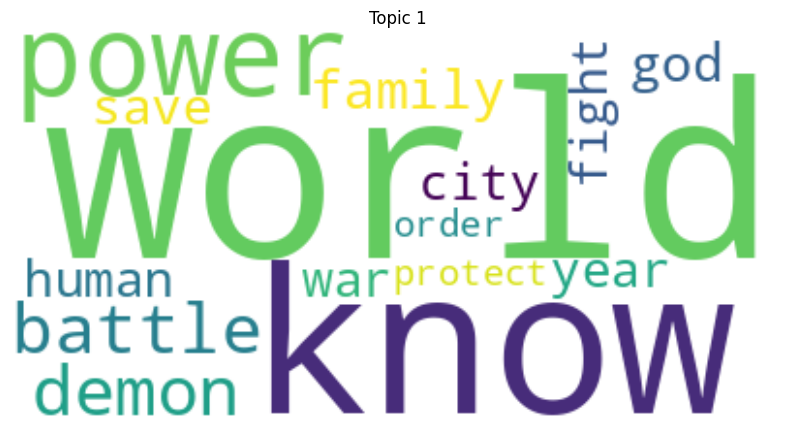

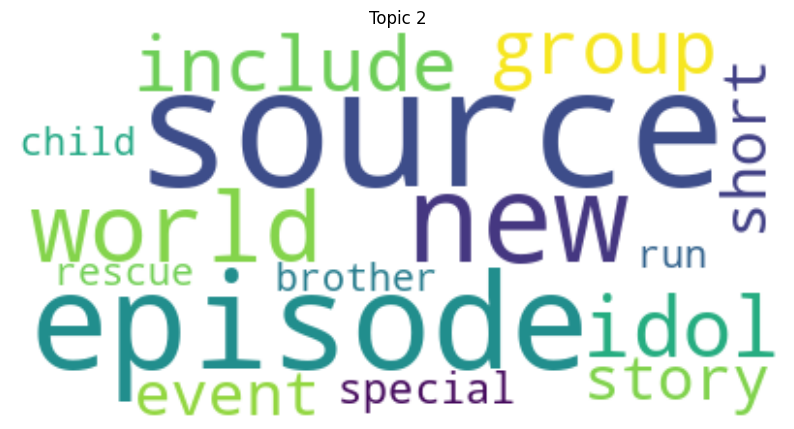

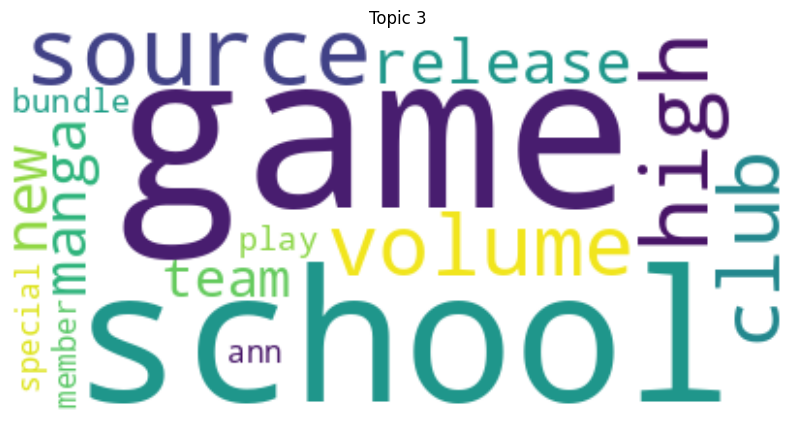

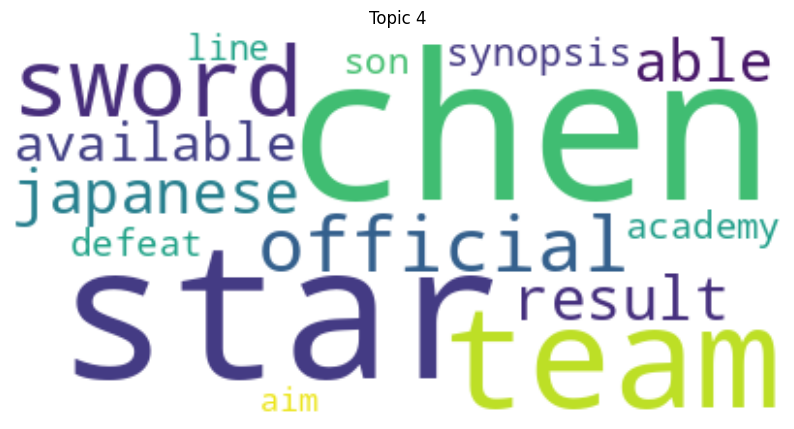

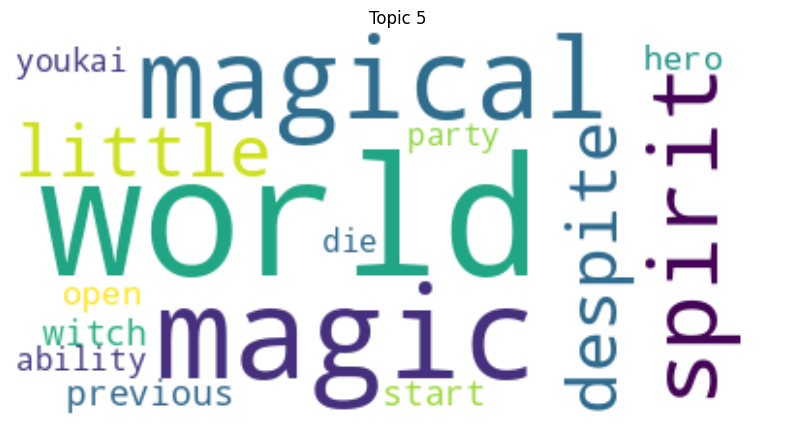

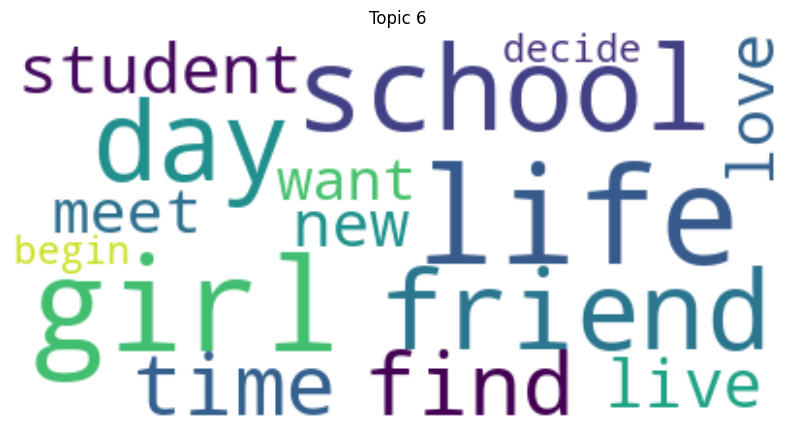

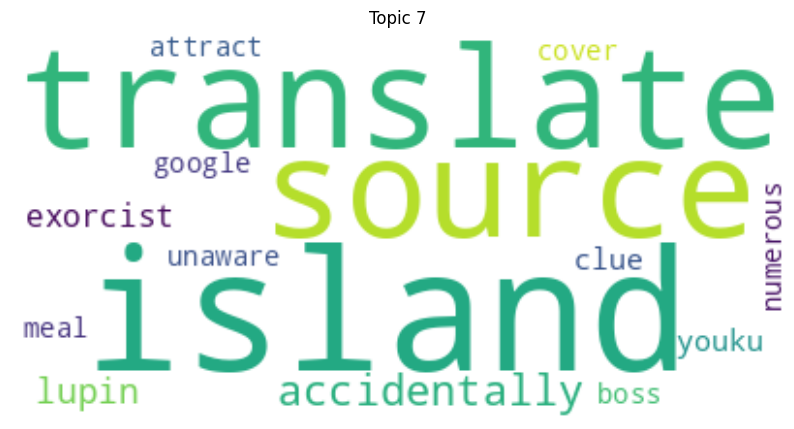

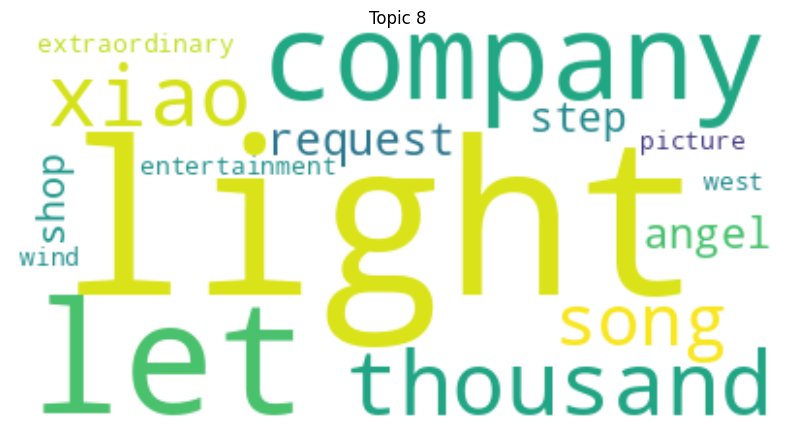

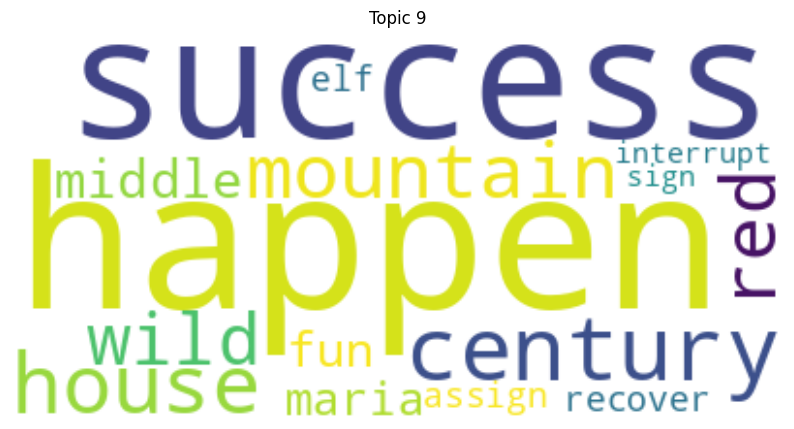

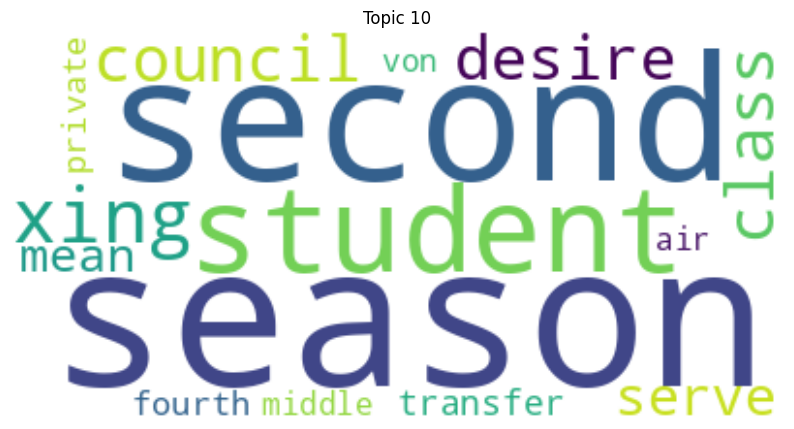

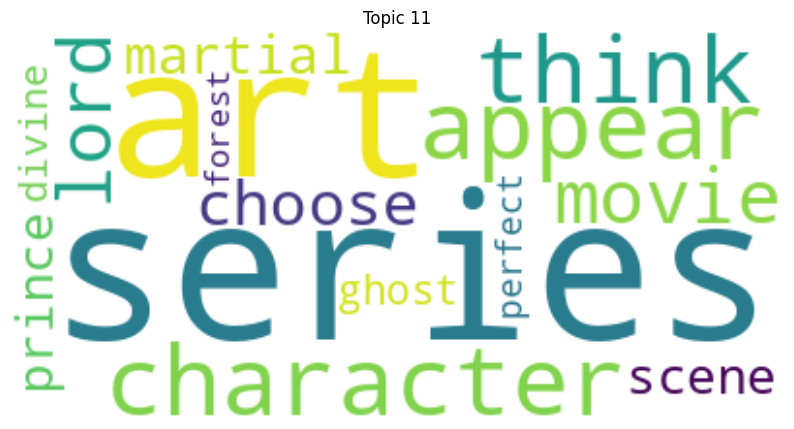

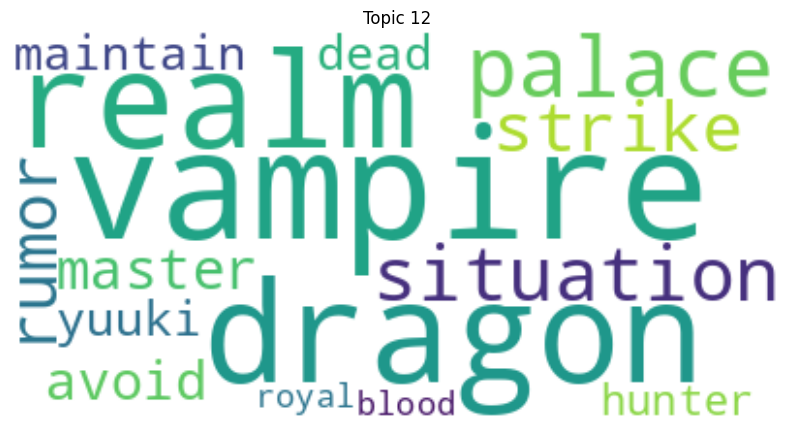

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_num in range(12):
    words = dict(lda_model.show_topic(topic_num, 15))
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(words)

    plt.figure(figsize=(10,20))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_num+1}")
    plt.show()


# Single Word cloud for all Topics.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


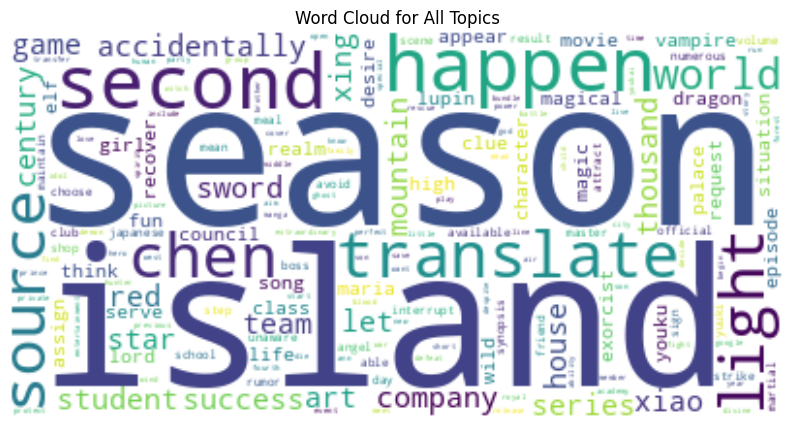

In [ ]:
# Combine words from all topics
combined_words = {}
for topic_num in range(12):
    words = dict(lda_model.show_topic(topic_num, 15))
    combined_words.update(words)

# Generate the word cloud for all topics combined
wordcloud = WordCloud(background_color="white").generate_from_frequencies(combined_words)

# Display the combined word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for All Topics")
plt.show()


# Top 5 Topics Word Clouds

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


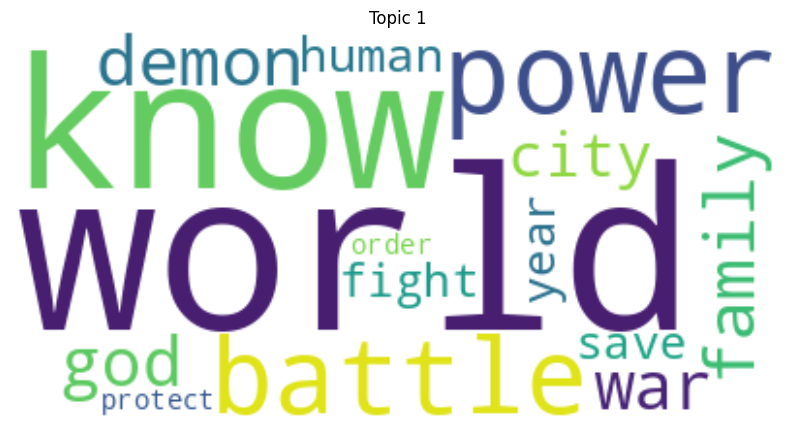

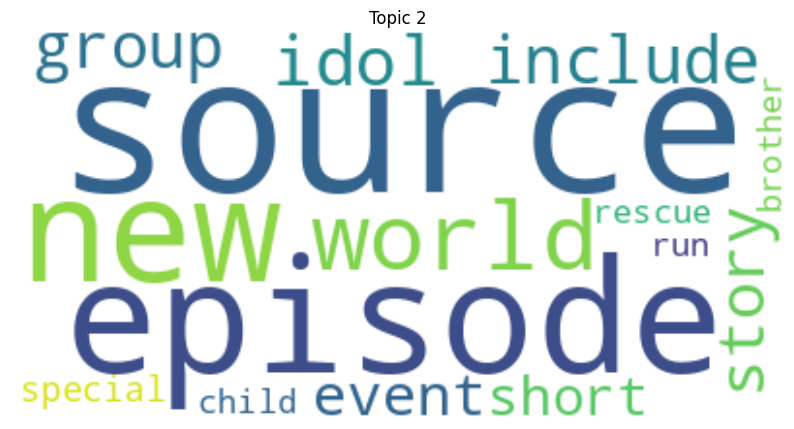

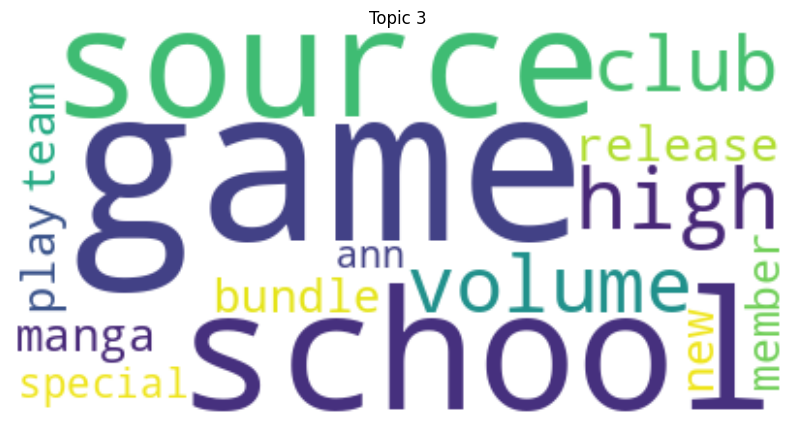

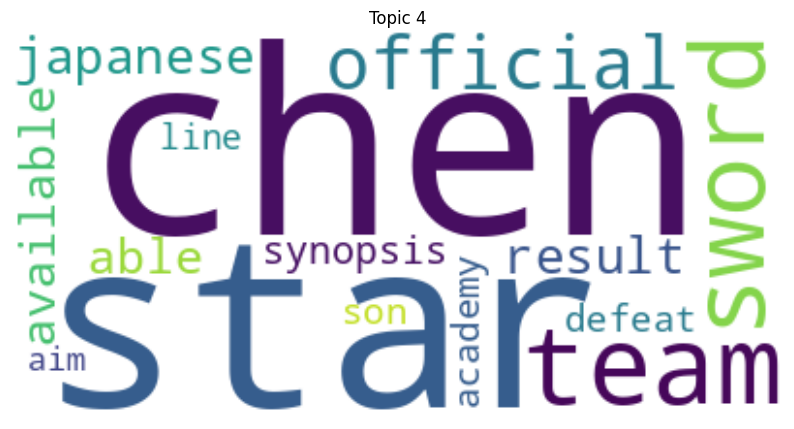

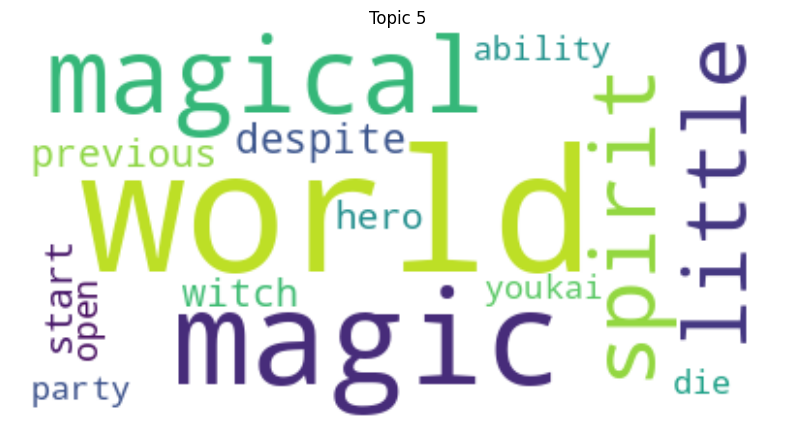

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the top 5 topics that best represent key anime themes related to genre
top_topics = [0, 1, 2, 3, 4]  # You can adjust this to select the 5 most relevant topics

for topic_num in top_topics:
    words = dict(lda_model.show_topic(topic_num, 15))  # Get the top 15 words for the topic
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_num+1}")
    plt.show()


# Machine Learning part

In [ ]:
# Linear

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Assuming Anime_data is a DataFrame that includes 'genres', 'studios', 'rating', and 'rank'

# One-hot encoding categorical features (genres, studios)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit-transform genres and studios
encoded_features = encoder.fit_transform(Anime_data[['genres', 'studios','popularity']])

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['genres', 'studios','popularity']))

# One-hot encode 'rating' (to avoid string-to-float conversion issues)
rating_encoded = pd.get_dummies(Anime_data['rating'], prefix='rating')

# Reset the index before concatenation
encoded_df = encoded_df.reset_index(drop=True)
rating_encoded = rating_encoded.reset_index(drop=True)
Anime_data = Anime_data.reset_index(drop=True)

# Combine encoded features with numeric columns
X = pd.concat([encoded_df, rating_encoded], axis=1)  # Add rating encoding
y = Anime_data['rank']  # Target variable

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Display predictions vs actual values
results = pd.DataFrame({'Actual Rank': y_test.values, 'Predicted Rank': y_pred})
print(results)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 336.4874856614223
      Actual Rank  Predicted Rank
0            4446     4447.531614
1            1367     1366.040353
2            4600     4599.755968
3             895      895.934254
4              32       31.875196
...           ...             ...
2007         1541     1545.404147
2008         5560     5545.051203
2009         3686     3688.015413
2010         1205     1205.066481
2011         1452     2082.759107

[2012 rows x 2 columns]


Random forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


R-squared: 0.9579112636041335
RMSE: 336.4874856614223


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Our model explains 87% of the variability in anime rankings based on features like genre, studio, and rating, indicating strong predictive power."

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("New RMSE:", rmse)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New RMSE: 598.3188416755951


In [ ]:
# Print distinct popularity and rank


print(Anime_data[['popularity', 'rank']].head(10))


   popularity  rank
0         164     1
1         164     1
2         164     1
3         164     1
4        2426     4
5        2426     4
6        2426     4
7        2426     4
8          21     5
9          21     5


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Anime_data[['popularity', 'rank']].drop_duplicates(subset='rank').head(10))


    popularity  rank
0          164     1
4         2426     4
8           21     5
15         343     6
23        1537     7
32         381    12
36         170    13
40         784    14
48         460    15
52          20    18


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Question 5- Seasonal Pattern.



Question: How has the average rank and popularity of anime evolved over time, and are there any noticeable trends or seasonal patterns in anime releases?

Why This Question?
Relevance: It leverages the start_date column to analyze trends over time.

Insightful: It helps uncover whether anime quality (rank) or audience interest (popularity) has changed over the years.

Actionable: The results can inform stakeholders about trends in the anime industry (e.g., are newer anime performing better or worse than older ones?).

In [ ]:
# Convert 'start_date' to datetime
Anime_data['start_date'] = pd.to_datetime(Anime_data['start_date'], errors='coerce')
Anime_data['start_year'] = Anime_data['start_date'].dt.year

# Compute yearly median rank & median popularity
yearly_stats = Anime_data.groupby('start_year')[['rank', 'popularity']].median()





/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


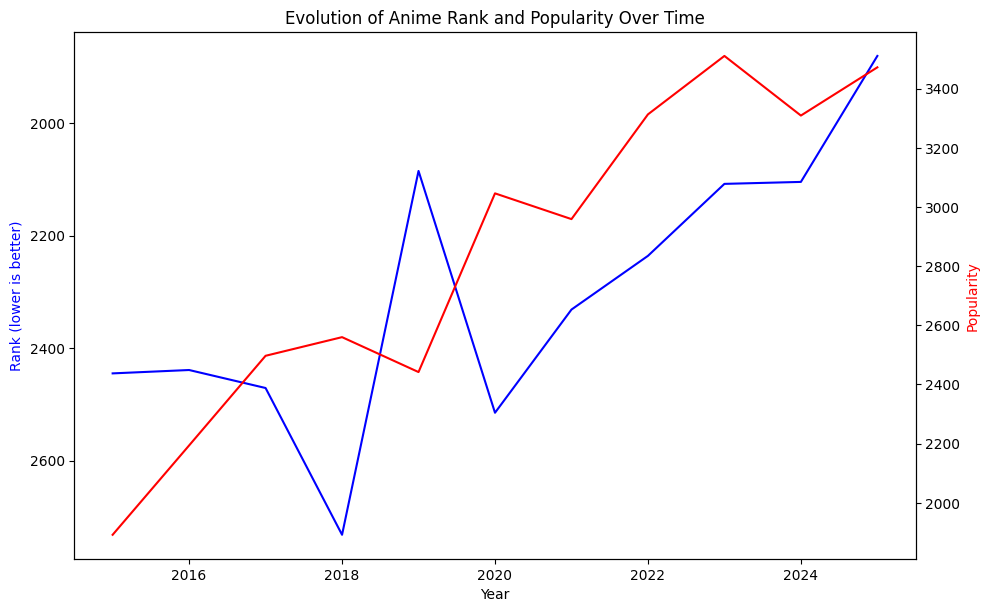

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot Rank (on the left y-axis, inverted)
ax1.plot(yearly_stats.index, yearly_stats['rank'], label='Median Rank', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rank (lower is better)', color='b')
ax1.invert_yaxis()  # Invert rank axis since lower is better

# Create a second y-axis for Popularity
ax2 = ax1.twinx()
ax2.plot(yearly_stats.index, yearly_stats['popularity'], label='Median Popularity', color='r')
ax2.set_ylabel('Popularity', color='r')

fig.tight_layout()
plt.title("Evolution of Anime Rank and Popularity Over Time")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


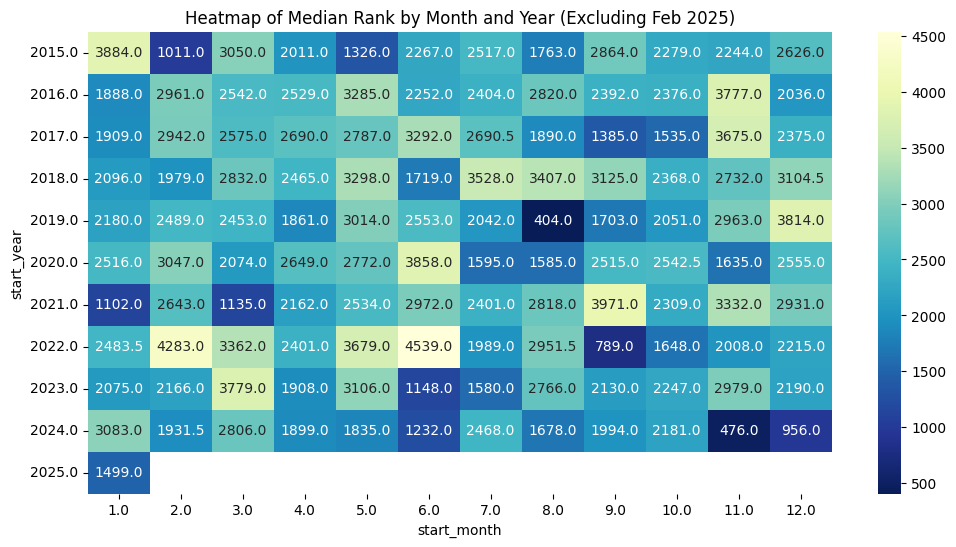

In [ ]:
#Filter out February 2025
Anime_data_filtered = Anime_data[~((Anime_data['start_year'] == 2025) & (Anime_data['start_month'] == 2))]

# Group by start year and start month, and calculate the median rank and popularity
monthly_stats = Anime_data_filtered.groupby(['start_year', 'start_month'])[['rank', 'popularity']].median().unstack()

# Plot the heatmap for median rank by month and year
plt.figure(figsize=(12,6))
sns.heatmap(monthly_stats['rank'], annot=True, cmap="YlGnBu_r", fmt=".1f")  # Reversed color map for lower rank being darker
plt.title("Heatmap of Median Rank by Month and Year (Excluding Feb 2025)")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


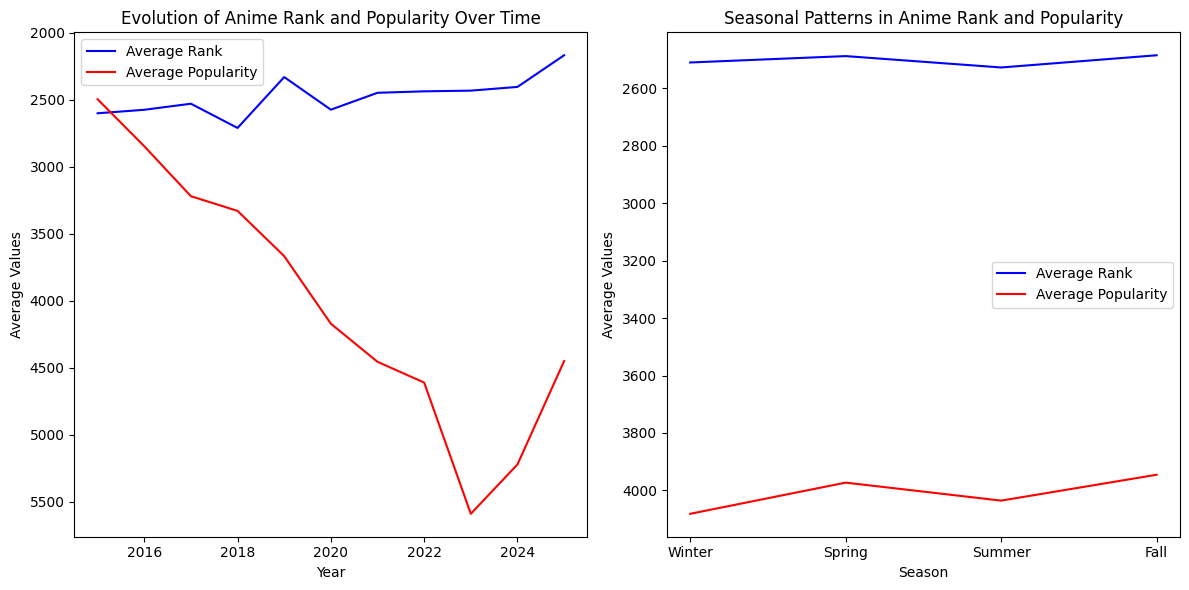

Yearly Trends:
Based on the graph, the average rank of anime has generally...
Popularity has...

Seasonal Patterns:
The seasonal analysis suggests that...
For example, Winter releases may have...

Further Analysis:
It would be beneficial to investigate specific genres or demographics to gain a deeper understanding of the trends.
Additionally, exploring external factors such as major anime releases or industry events could provide context.


In [ ]:

# Calculate yearly statistics
yearly_stats = Anime_data.groupby('start_year')[['rank', 'popularity']].mean()

# Calculate monthly statistics (for seasonality)
monthly_stats = Anime_data.groupby('start_month')[['rank', 'popularity']].mean()

# Define season mapping (adjust as needed for your data)
def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Fall"
    else:
        return "Winter"

Anime_data['season'] = Anime_data['start_month'].apply(get_season)
seasonal_stats = Anime_data.groupby('season')[['rank', 'popularity']].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']) #Reorder for logical plotting.


# --- Plotting ---

plt.figure(figsize=(12, 6))

# Plot yearly trends
plt.subplot(1, 2, 1)  # Create a 1x2 grid, and this is the first subplot
plt.plot(yearly_stats.index, yearly_stats['rank'], label='Average Rank', color='b')
plt.plot(yearly_stats.index, yearly_stats['popularity'], label='Average Popularity', color='r')
plt.xlabel("Year")
plt.ylabel("Average Values")
plt.title("Evolution of Anime Rank and Popularity Over Time")
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis for rank (lower is better)

# Plot seasonal trends
plt.subplot(1, 2, 2)  # This is the second subplot
plt.plot(seasonal_stats.index, seasonal_stats['rank'], label='Average Rank', color='b')
plt.plot(seasonal_stats.index, seasonal_stats['popularity'], label='Average Popularity', color='r')
plt.xlabel("Season")
plt.ylabel("Average Values")
plt.title("Seasonal Patterns in Anime Rank and Popularity")
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis for rank (lower is better)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()


# --- Interpretation (add this after running the code and examining the plots) ---

print("Yearly Trends:")
print("Based on the graph, the average rank of anime has generally...")  # Describe the trend (improving/declining/stable)
print("Popularity has...") # Describe the trend

print("\nSeasonal Patterns:")
print("The seasonal analysis suggests that...") # Describe observed patterns.
print("For example, Winter releases may have...") # Provide specific examples from the graph

print("\nFurther Analysis:")
print("It would be beneficial to investigate specific genres or demographics to gain a deeper understanding of the trends.")
print("Additionally, exploring external factors such as major anime releases or industry events could provide context.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


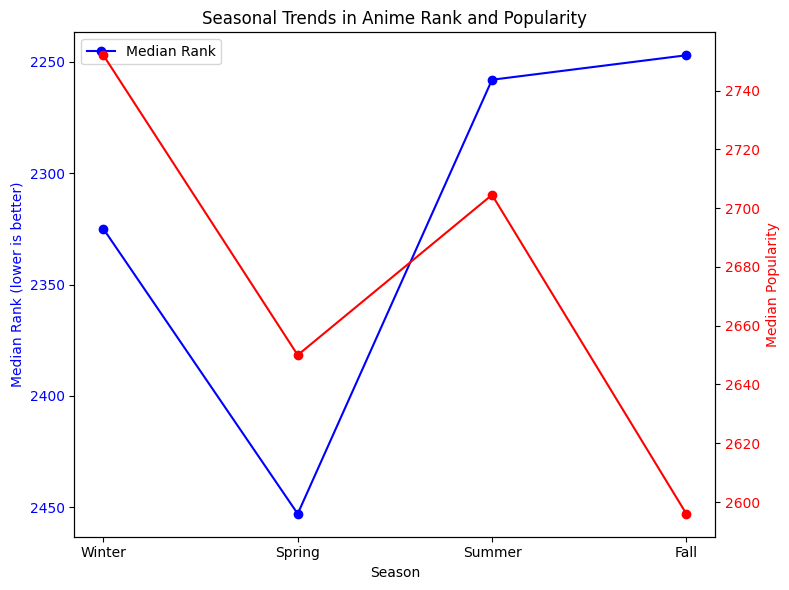

In [ ]:
# Seasonal stats (reorder to ensure logical plotting)
seasonal_stats = Anime_data.groupby('season')[['rank', 'popularity']].median().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# --- Plotting Seasonal Trends with Dual Axis ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot median rank
ax.plot(seasonal_stats.index, seasonal_stats['rank'], label='Median Rank', color='b', marker='o')
ax.set_xlabel("Season")
ax.set_ylabel("Median Rank (lower is better)", color='b')
ax.invert_yaxis()  # Invert rank axis since lower is better
ax.tick_params(axis='y', labelcolor='b')

# Create second y-axis for popularity
ax_twin = ax.twinx()
ax_twin.plot(seasonal_stats.index, seasonal_stats['popularity'], label='Median Popularity', color='r', marker='o')
ax_twin.set_ylabel("Median Popularity", color='r')
ax_twin.tick_params(axis='y', labelcolor='r')

# Title and legends
ax.set_title("Seasonal Trends in Anime Rank and Popularity")
ax.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


# Finding the hidden gems

In [ ]:
#Discover underrated anime with high rank but low popularity counts.

#Underrated_anime= Anime_data[Anime_data['rank'] <= 50] & [Anime_data['popularity']<=300]
Underrated_anime = Anime_data[(Anime_data['rank'] <= 50) & (Anime_data['popularity'] <= 300)]

Underrated_anime.head(10)

#display name of Animes and there rank and polpularuty
Hidden_gems= Underrated_anime[['title','rank','popularity','main_picture']]
Hidden_gems.head(20)
#i wrote this code but i want to show the audience that there are some anime titles that are not much popular but have the rank somewhere between 1- 50

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title  rank  popularity  \
0                                   Sousou no Frieren     1         164   
1                                   Sousou no Frieren     1         164   
2                                   Sousou no Frieren     1         164   
3                                   Sousou no Frieren     1         164   
8                  Shingeki no Kyojin Season 3 Part 2     5          21   
9                  Shingeki no Kyojin Season 3 Part 2     5          21   
10                 Shingeki no Kyojin Season 3 Part 2     5          21   
11                 Shingeki no Kyojin Season 3 Part 2     5          21   
12                 Shingeki no Kyojin Season 3 Part 2     5          21   
13                 Shingeki no Kyojin Season 3 Part 2     5          21   
14                 Shingeki no Kyojin Season 3 Part 2     5          21   
36         Kaguya-sama wa Kokurasetai: Ultra Romantic    13         170   
37         Kaguya-sama wa Kokurasetai: Ultra Romantic    13         170   
38         Kaguya-sama wa Kokurasetai: Ultra Romantic    13         170   
39         Kaguya-sama wa Kokurasetai: Ultra Romantic    13         170   
52                                     Koe no Katachi    18          20   
53                                     Koe no Katachi    18          20   
54                                     Koe no Katachi    18          20   
75  Shingeki no Kyojin: The Final Season - Kankets...    26         291   
76  Shingeki no Kyojin: The Final Season - Kankets...    26         291   

                                         main_picture  
0   https://cdn.myanimelist.net/images/anime/1015/...  
1   https://cdn.myanimelist.net/images/anime/1015/...  
2   https://cdn.myanimelist.net/images/anime/1015/...  
3   https://cdn.myanimelist.net/images/anime/1015/...  
8   https://cdn.myanimelist.net/images/anime/1517/...  
9   https://cdn.myanimelist.net/images/anime/1517/...  
10  https://cdn.myanimelist.net/images/anime/1517/...  
11  https://cdn.myanimelist.net/images/anime/1517/...  
12  https://cdn.myanimelist.net/images/anime/1517/...  
13  https://cdn.myanimelist.net/images/anime/1517/...  
14  https://cdn.myanimelist.net/images/anime/1517/...  
36  https://cdn.myanimelist.net/images/anime/1160/...  
37  https://cdn.myanimelist.net/images/anime/1160/...  
38  https://cdn.myanimelist.net/images/anime/1160/...  
39  https://cdn.myanimelist.net/images/anime/1160/...  
52  https://cdn.myanimelist.net/images/anime/1122/...  
53  https://cdn.myanimelist.net/images/anime/1122/...  
54  https://cdn.myanimelist.net/images/anime/1122/...  
75  https://cdn.myanimelist.net/images/anime/1279/...  
76  https://cdn.myanimelist.net/images/anime/1279/...